In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [2]:
pd.options.display.notebook_repr_html = False

In [3]:
%matplotlib inline

In [4]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randn(5),
                'data2' : np.random.randn(5)})
df

      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
1  0.478943  0.092908    a  two
2 -0.519439  0.281746    b  one
3 -0.555730  0.769023    b  two
4  1.965781  1.246435    a  one

In [6]:
grouped = df['data1'].groupby(df['key1'])

In [7]:
grouped

In [8]:
grouped.mean()

key1
a    0.746672
b   -0.537585
Name: data1, dtype: float64

In [9]:
means = df['data1'].groupby([df['key1'],df['key2']]).mean()

In [10]:
means

key1  key2
a     one     0.880536
      two     0.478943
b     one    -0.519439
      two    -0.555730
Name: data1, dtype: float64

In [11]:
means.unstack()

key2       one       two
key1                    
a     0.880536  0.478943
b    -0.519439 -0.555730

In [12]:
states = np.array(['Ohio','California','California','Ohio','Ohio'])
years = np.array([2005,2005,2006,2005,2006])
df['data1'].groupby([states,years]).mean()

California  2005    0.478943
            2006   -0.519439
Ohio        2005   -0.380219
            2006    1.965781
Name: data1, dtype: float64

In [13]:
df.groupby('key1').mean()

         data1     data2
key1                    
a     0.746672  0.910916
b    -0.537585  0.525384

In [14]:
df.groupby(['key1','key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [15]:
for name,group in df.groupby('key1'):
    print(name)
    print(group)

a
      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
1  0.478943  0.092908    a  two
4  1.965781  1.246435    a  one
b
      data1     data2 key1 key2
2 -0.519439  0.281746    b  one
3 -0.555730  0.769023    b  two


In [16]:
for (k1,k2),group in df.groupby(['key1','key2']):
    print(k1,k2)
    print(group)

a one
      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
4  1.965781  1.246435    a  one
a two
      data1     data2 key1 key2
1  0.478943  0.092908    a  two
b one
      data1     data2 key1 key2
2 -0.519439  0.281746    b  one
b two
     data1     data2 key1 key2
3 -0.55573  0.769023    b  two


In [17]:
pieces = dict(list(df.groupby('key1')))

In [18]:
pieces['b']

      data1     data2 key1 key2
2 -0.519439  0.281746    b  one
3 -0.555730  0.769023    b  two

In [19]:
df.dtypes

data1    float64
data2    float64
key1      object
key2      object
dtype: object

In [20]:
grouped = df.groupby(df.dtypes,axis=1)
dict(list(grouped))

{dtype('float64'):       data1     data2
 0 -0.204708  1.393406
 1  0.478943  0.092908
 2 -0.519439  0.281746
 3 -0.555730  0.769023
 4  1.965781  1.246435, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

In [21]:
df.groupby(['key1','key2'])[['data2']].mean()

              data2
key1 key2          
a    one   1.319920
     two   0.092908
b    one   0.281746
     two   0.769023

In [23]:
df.groupby('key1')['data1']

In [24]:
df.groupby('key1')[['data2']]

In [25]:
s_grouped = df.groupby(['key1','key2'])['data2']
s_grouped

In [26]:
s_grouped.mean()

key1  key2
a     one     1.319920
      two     0.092908
b     one     0.281746
      two     0.769023
Name: data2, dtype: float64

In [28]:
people = DataFrame(np.random.randn(5, 5),
                   columns=['a', 'b', 'c', 'd', 'e'],
                   index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.loc[2:3, ['b', 'c']] = np.nan # Add a few NA values
people

               a         b         c         d         e
Joe     0.560145 -1.265934  0.119827 -1.063512  0.332883
Steve  -2.359419 -0.199543 -1.541996 -0.970736 -1.307030
Wes     0.286350       NaN       NaN  0.331286  1.349742
Jim     0.069877  0.246674 -0.011862  1.004812  1.327195
Travis -0.919262 -1.549106  0.022185  0.758363 -0.660524

In [29]:
mapping = {'a':'red','b':'red','c':'blue',
          'd':'blue','e':'red','f':'orange'}

In [30]:
by_column = people.groupby(mapping,axis=1)

In [31]:
by_column.sum()

            blue       red
Joe    -0.943685 -0.372906
Steve  -2.512731 -3.865992
Wes     0.331286  1.636092
Jim     0.992950  1.643745
Travis  0.780548 -3.128892

In [32]:
map_series=Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [33]:
people.groupby(map_series,axis=1).count()

        blue  red
Joe        2    3
Steve      2    3
Wes        1    2
Jim        2    3
Travis     2    3

In [34]:
people.groupby(len).sum()

          a         b         c         d         e
3  0.916372 -1.019260  0.107966  0.272585  3.009820
5 -2.359419 -0.199543 -1.541996 -0.970736 -1.307030
6 -0.919262 -1.549106  0.022185  0.758363 -0.660524

In [35]:
key_list=['one','one','one','two','two']
people.groupby([len,key_list]).min()

              a         b         c         d         e
3 one  0.286350 -1.265934  0.119827 -1.063512  0.332883
  two  0.069877  0.246674 -0.011862  1.004812  1.327195
5 one -2.359419 -0.199543 -1.541996 -0.970736 -1.307030
6 two -0.919262 -1.549106  0.022185  0.758363 -0.660524

In [36]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]], names=['cty', 'tenor'])
hier_df = DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.862580 -0.010032  0.050009  0.670216  0.852965
1     -0.955869 -0.023493 -2.304234 -0.652469 -1.218302
2     -1.332610  1.074623  0.723642  0.690002  1.001543
3     -0.503087 -0.622274 -0.921169 -0.726213  0.222896

In [37]:
hier_df.groupby(level='cty', axis=1).count()

cty  JP  US
0     2   3
1     2   3
2     2   3
3     2   3

In [39]:
hier_df.groupby(level='tenor', axis=1).sum()

tenor         1         3         5
0      1.532796  0.842933  0.050009
1     -1.608338 -1.241795 -2.304234
2     -0.642608  2.076166  0.723642
3     -1.229301 -0.399379 -0.921169

In [40]:
df

      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
1  0.478943  0.092908    a  two
2 -0.519439  0.281746    b  one
3 -0.555730  0.769023    b  two
4  1.965781  1.246435    a  one

In [41]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a    1.668413
b   -0.523068
Name: data1, dtype: float64

In [42]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

grouped.agg(peak_to_peak)

         data1     data2
key1                    
a     2.170488  1.300498
b     0.036292  0.487276

In [43]:
grouped.describe()

     data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.746672  1.109736 -0.204708  0.137118  0.478943  1.222362   
b      2.0 -0.537585  0.025662 -0.555730 -0.546657 -0.537585 -0.528512   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.965781   3.0  0.910916  0.712217  0.092908  0.669671  1.246435   
b    -0.519439   2.0  0.525384  0.344556  0.281746  0.403565  0.525384   

                          
           75%       max  
key1                      
a     1.319920  1.393406  
b     0.647203  0.769023  

In [44]:
tips = pd.read_csv(r'C:\Users\Zishi\Documents\GitHub\pydata-book\ch08\tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

   total_bill   tip     sex smoker  day    time  size   tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2  0.059447
1       10.34  1.66    Male     No  Sun  Dinner     3  0.160542
2       21.01  3.50    Male     No  Sun  Dinner     3  0.166587
3       23.68  3.31    Male     No  Sun  Dinner     2  0.139780
4       24.59  3.61  Female     No  Sun  Dinner     4  0.146808
5       25.29  4.71    Male     No  Sun  Dinner     4  0.186240

In [45]:
grouped_pct = tips.groupby(['sex','smoker'])
grouped_pct.agg('mean')

               total_bill       tip      size   tip_pct
sex    smoker                                          
Female No       18.105185  2.773519  2.592593  0.156921
       Yes      17.977879  2.931515  2.242424  0.182150
Male   No       19.791237  3.113402  2.711340  0.160669
       Yes      22.284500  3.051167  2.500000  0.152771

In [46]:
grouped_pct.agg(['mean','std',peak_to_peak])

              total_bill                              tip            \
                    mean       std peak_to_peak      mean       std   
sex    smoker                                                         
Female No      18.105185  7.286455        28.58  2.773519  1.128425   
       Yes     17.977879  9.189751        41.23  2.931515  1.219916   
Male   No      19.791237  8.726566        40.82  3.113402  1.489559   
       Yes     22.284500  9.911845        43.56  3.051167  1.500120   

                                size                          tip_pct  \
              peak_to_peak      mean       std peak_to_peak      mean   
sex    smoker                                                           
Female No             4.20  2.592593  1.073146            5  0.156921   
       Yes            5.50  2.242424  0.613917            3  0.182150   
Male   No             7.75  2.711340  0.989094            4  0.160669   
       Yes            9.00  2.500000  0.892530            4  0.1

In [47]:
grouped_pct.agg([('foo','mean'),('bar',np.std)])

              total_bill                 tip                size            \
                     foo       bar       foo       bar       foo       bar   
sex    smoker                                                                
Female No      18.105185  7.286455  2.773519  1.128425  2.592593  1.073146   
       Yes     17.977879  9.189751  2.931515  1.219916  2.242424  0.613917   
Male   No      19.791237  8.726566  3.113402  1.489559  2.711340  0.989094   
       Yes     22.284500  9.911845  3.051167  1.500120  2.500000  0.892530   

                tip_pct            
                    foo       bar  
sex    smoker                      
Female No      0.156921  0.036421  
       Yes     0.182150  0.071595  
Male   No      0.160669  0.041849  
       Yes     0.152771  0.090588  

In [49]:
functions =['count','mean','max']
grouped = tips.groupby(['sex', 'smoker'])
result = grouped['tip_pct','total_bill'].agg(functions)

In [50]:
result

              tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

In [51]:
result['tip_pct']

               count      mean       max
sex    smoker                           
Female No         54  0.156921  0.252672
       Yes        33  0.182150  0.416667
Male   No         97  0.160669  0.291990
       Yes        60  0.152771  0.710345

In [52]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

                   tip_pct              total_bill           
              Durchschnitt Abweichung Durchschnitt Abweichung
sex    smoker                                                
Female No         0.156921   0.001327    18.105185  53.092422
       Yes        0.182150   0.005126    17.977879  84.451517
Male   No         0.160669   0.001751    19.791237  76.152961
       Yes        0.152771   0.008206    22.284500  98.244673

In [54]:
grouped.agg({'tip':np.max,'size':'sum'})

                tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

In [55]:
grouped.agg({'tip_pct':['min','max','std'],
            'size':'sum'})

                tip_pct                     size
                    min       max       std  sum
sex    smoker                                   
Female No      0.056797  0.252672  0.036421  140
       Yes     0.056433  0.416667  0.071595   74
Male   No      0.071804  0.291990  0.041849  263
       Yes     0.035638  0.710345  0.090588  150

In [57]:
tips.groupby(['sex','smoker'],as_index=False).mean()

      sex smoker  total_bill       tip      size   tip_pct
0  Female     No   18.105185  2.773519  2.592593  0.156921
1  Female    Yes   17.977879  2.931515  2.242424  0.182150
2    Male     No   19.791237  3.113402  2.711340  0.160669
3    Male    Yes   22.284500  3.051167  2.500000  0.152771

In [58]:
test = grouped.agg({'tip_pct':['min','max','std'],
            'size':'sum'})
test.reset_index()

      sex smoker   tip_pct                     size
                       min       max       std  sum
0  Female     No  0.056797  0.252672  0.036421  140
1  Female    Yes  0.056433  0.416667  0.071595   74
2    Male     No  0.071804  0.291990  0.041849  263
3    Male    Yes  0.035638  0.710345  0.090588  150

In [59]:
df

      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
1  0.478943  0.092908    a  two
2 -0.519439  0.281746    b  one
3 -0.555730  0.769023    b  two
4  1.965781  1.246435    a  one

In [60]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')

In [61]:
k1_means

      mean_data1  mean_data2
key1                        
a       0.746672    0.910916
b      -0.537585    0.525384

In [62]:
df.groupby('key1').mean()

         data1     data2
key1                    
a     0.746672  0.910916
b    -0.537585  0.525384

In [65]:
pd.merge(df,k1_means,left_on='key1',right_index=True)

      data1     data2 key1 key2  mean_data1  mean_data2
0 -0.204708  1.393406    a  one    0.746672    0.910916
1  0.478943  0.092908    a  two    0.746672    0.910916
4  1.965781  1.246435    a  one    0.746672    0.910916
2 -0.519439  0.281746    b  one   -0.537585    0.525384
3 -0.555730  0.769023    b  two   -0.537585    0.525384

In [67]:
key = ['one','two','one','two','one']

In [68]:
people.groupby(key).mean()

            a         b         c         d         e
one -0.024256 -1.407520  0.071006  0.008712  0.340700
two -1.144771  0.023566 -0.776929  0.017038  0.010082

In [69]:
people.groupby(key).transform(np.mean)

               a         b         c         d         e
Joe    -0.024256 -1.407520  0.071006  0.008712  0.340700
Steve  -1.144771  0.023566 -0.776929  0.017038  0.010082
Wes    -0.024256 -1.407520  0.071006  0.008712  0.340700
Jim    -1.144771  0.023566 -0.776929  0.017038  0.010082
Travis -0.024256 -1.407520  0.071006  0.008712  0.340700

In [70]:
people

               a         b         c         d         e
Joe     0.560145 -1.265934  0.119827 -1.063512  0.332883
Steve  -2.359419 -0.199543 -1.541996 -0.970736 -1.307030
Wes     0.286350       NaN       NaN  0.331286  1.349742
Jim     0.069877  0.246674 -0.011862  1.004812  1.327195
Travis -0.919262 -1.549106  0.022185  0.758363 -0.660524

In [71]:
def demean(arr):
    return arr - arr.mean()

demeaned = people.groupby(key).transform(demean)
demeaned

               a         b         c         d         e
Joe     0.584401  0.141586  0.048821 -1.072225 -0.007817
Steve  -1.214648 -0.223109 -0.765067 -0.987774 -1.317112
Wes     0.310605       NaN       NaN  0.322574  1.009042
Jim     1.214648  0.223109  0.765067  0.987774  1.317112
Travis -0.895006 -0.141586 -0.048821  0.749651 -1.001225

In [75]:
demeaned.groupby(key).mean().astype(int)

     a  b  c  d  e
one  0  0  0  0  0
two  0  0  0  0  0

In [87]:
def top(df,n=5,column='tip_pct'):
    return df.sort_values(by=column,ascending=False)[:n]

In [88]:
top(tips,n=6)

     total_bill   tip     sex smoker  day    time  size   tip_pct
172        7.25  5.15    Male    Yes  Sun  Dinner     2  0.710345
178        9.60  4.00  Female    Yes  Sun  Dinner     2  0.416667
67         3.07  1.00  Female    Yes  Sat  Dinner     1  0.325733
232       11.61  3.39    Male     No  Sat  Dinner     2  0.291990
183       23.17  6.50    Male    Yes  Sun  Dinner     4  0.280535
109       14.31  4.00  Female    Yes  Sat  Dinner     2  0.279525

In [89]:
tips.groupby('smoker').apply(top)

            total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
Yes    172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525

In [93]:
tips['sex_'] = tips['sex'].apply(lambda x:1 if x == 'Male' else 0)
del tips['sex_']

In [94]:
tips.groupby(['smoker','day']).apply(top,n=1,column='total_bill')

                 total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  

In [95]:
result = tips.groupby('smoker')['tip_pct'].describe()

In [96]:
result

        count      mean       std       min       25%       50%       75%  \
smoker                                                                      
No      151.0  0.159328  0.039910  0.056797  0.136906  0.155625  0.185014   
Yes      93.0  0.163196  0.085119  0.035638  0.106771  0.153846  0.195059   

             max  
smoker            
No      0.291990  
Yes     0.710345  

In [98]:
tips.groupby('smoker',group_keys=False).apply(top)
#flatten

     total_bill   tip     sex smoker   day    time  size   tip_pct
232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345
178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525

In [100]:
frame = DataFrame({'data1':np.random.randn(1000),
                  'data2':np.random.randn(1000)})

In [101]:
factor = pd.cut(frame.data1,4)
factor[:10]

0    (-1.23, 0.489]
1    (-1.23, 0.489]
2    (0.489, 2.208]
3    (-1.23, 0.489]
4    (0.489, 2.208]
5    (0.489, 2.208]
6    (-1.23, 0.489]
7    (0.489, 2.208]
8    (-1.23, 0.489]
9    (0.489, 2.208]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.956, -1.23] < (-1.23, 0.489] < (0.489, 2.208] < (2.208, 3.928]]

In [104]:
def get_stats(group):
    return {'min':group.min(),'max':group.max(),
           'count':group.count(),'mean':group.mean()}
grouped = frame.data2.groupby(factor)
grouped.apply(get_stats).unstack()

                 count       max      mean       min
data1                                               
(-2.956, -1.23]   94.0  1.670835 -0.043940 -3.399312
(-1.23, 0.489]   599.0  3.260383 -0.011459 -2.989741
(0.489, 2.208]   296.0  2.954439  0.092068 -3.745356
(2.208, 3.928]    11.0  1.765640  0.055158 -1.929776

In [106]:
grouping = pd.qcut(frame.data1,10,labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

       count       max      mean       min
data1                                     
0      100.0  1.670835 -0.022372 -3.399312
1      100.0  2.628441 -0.045403 -2.153545
2      100.0  2.527939 -0.085406 -2.925113
3      100.0  3.260383  0.073851 -2.315555
4      100.0  2.074345 -0.120305 -2.047939
5      100.0  2.184810  0.036851 -2.989741
6      100.0  2.458842  0.001262 -2.084231
7      100.0  2.954439 -0.006403 -3.056990
8      100.0  2.735527  0.120793 -3.745356
9      100.0  2.377020  0.215777 -2.064111

In [108]:
s = Series(np.random.randn(6))
s[::2] = np.nan
s

0         NaN
1    0.441817
2         NaN
3    0.682841
4         NaN
5    0.425384
dtype: float64

In [109]:
s.fillna(s.mean())

0    0.516680
1    0.441817
2    0.516680
3    0.682841
4    0.516680
5    0.425384
dtype: float64

In [110]:
states = ['Ohio','New York','Vermont','Florida',
         'Oregon','Nevada','California','Idaho']
group_key = ['East']*4 + ['West']*4
data = Series(np.random.randn(8),index=states)
data[['Vermont','Nevada','Idaho']] = np.nan
data

Ohio         -3.428254
New York     -0.296336
Vermont            NaN
Florida      -0.867165
Oregon       -0.100440
Nevada             NaN
California   -1.266473
Idaho              NaN
dtype: float64

In [111]:
data.groupby(group_key).mean()

East   -1.530585
West   -0.683457
dtype: float64

In [112]:
fill_mean = lambda g:g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio         -3.428254
New York     -0.296336
Vermont      -1.530585
Florida      -0.867165
Oregon       -0.100440
Nevada       -0.683457
California   -1.266473
Idaho        -0.683457
dtype: float64

In [114]:
fill_values = {'East':0.5,'West':-1}
fill_func = lambda g:g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio         -3.428254
New York     -0.296336
Vermont       0.500000
Florida      -0.867165
Oregon       -0.100440
Nevada       -1.000000
California   -1.266473
Idaho        -1.000000
dtype: float64

In [119]:
suits =['H','S','C','D']
card_val = (list(range(1,11))+[10]*3)*4
base_names = ['A']+list(range(2,11))+['J','K','Q']
cards=[]
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num)+suit for num in base_names)
deck = Series(card_val,index=cards)

In [120]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [121]:
def draw(deck,n=5):
    return deck.take(np.random.permutation(len(deck))[:n])
draw(deck)

9D      9
4D      4
10S    10
9C      9
3D      3
dtype: int64

In [122]:
get_suit = lambda card: card[-1]
deck.groupby(get_suit).apply(draw,n=2)

C  KC    10
   JC    10
D  AD     1
   5D     5
H  5H     5
   6H     6
S  7S     7
   KS    10
dtype: int64

In [123]:
deck.groupby(get_suit,group_keys=False).apply(draw,n=2)

5C    5
2C    2
3D    3
7D    7
9H    9
2H    2
9S    9
5S    5
dtype: int64

In [127]:
df = DataFrame({'category':list('aaaabbbb'),
               'data':np.random.randn(8),
               'weights':np.random.randint(1,9,8)})
df

  category      data  weights
0        a  0.583256        1
1        a  0.877189        5
2        a  0.436201        5
3        a  0.486562        7
4        b -1.100844        2
5        b -0.339249        4
6        b -1.053048        2
7        b  0.451362        6

In [128]:
grouped = df.groupby('category')
get_wavg = lambda g:np.average(g['data'],weights=g['weights'])
grouped.apply(get_wavg)

category
a    0.586452
b   -0.211186
dtype: float64

In [130]:
close_px = pd.read_csv(r'C:\Users\Zishi\Documents\GitHub\pydata-book\ch09\stock_px.csv',parse_dates=True,index_col=0)
close_px.head()

            AAPL   MSFT    XOM     SPX
2003-01-02  7.40  21.11  29.22  909.03
2003-01-03  7.45  21.14  29.24  908.59
2003-01-06  7.45  21.52  29.96  929.01
2003-01-07  7.43  21.93  28.95  922.93
2003-01-08  7.28  21.31  28.83  909.93

In [133]:
rets = close_px.pct_change().dropna()
spx_corr = lambda x: x.corrwith(x['SPX'])
by_year = rets.groupby(lambda x: x.year)
by_year.apply(spx_corr)

          AAPL      MSFT       XOM  SPX
2003  0.541124  0.745174  0.661265  1.0
2004  0.374283  0.588531  0.557742  1.0
2005  0.467540  0.562374  0.631010  1.0
2006  0.428267  0.406126  0.518514  1.0
2007  0.508118  0.658770  0.786264  1.0
2008  0.681434  0.804626  0.828303  1.0
2009  0.707103  0.654902  0.797921  1.0
2010  0.710105  0.730118  0.839057  1.0
2011  0.691931  0.800996  0.859975  1.0

In [148]:
by_year.apply(lambda g:g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

In [149]:
import statsmodels.api as sm
def regress(data,yvar,xvars):
    Y=data[yvar]
    X=data[xvars]
    X['intercept']=1
    result=sm.OLS(Y,X).fit()
    return result.params

C:\Users\Zishi\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [150]:
by_year.apply(regress,'AAPL',['SPX'])

           SPX  intercept
2003  1.195406   0.000710
2004  1.363463   0.004201
2005  1.766415   0.003246
2006  1.645496   0.000080
2007  1.198761   0.003438
2008  0.968016  -0.001110
2009  0.879103   0.002954
2010  1.052608   0.001261
2011  0.806605   0.001514

In [152]:
tips.pivot_table(index=['sex','smoker'])

                   size       tip   tip_pct  total_bill
sex    smoker                                          
Female No      2.592593  2.773519  0.156921   18.105185
       Yes     2.242424  2.931515  0.182150   17.977879
Male   No      2.711340  3.113402  0.160669   19.791237
       Yes     2.500000  3.051167  0.152771   22.284500

In [154]:
tips.pivot_table(['tip_pct','size'],index=['sex','day'],
                columns='smoker')

                 size             tip_pct          
smoker             No       Yes        No       Yes
sex    day                                         
Female Fri   2.500000  2.000000  0.165296  0.209129
       Sat   2.307692  2.200000  0.147993  0.163817
       Sun   3.071429  2.500000  0.165710  0.237075
       Thur  2.480000  2.428571  0.155971  0.163073
Male   Fri   2.000000  2.125000  0.138005  0.144730
       Sat   2.656250  2.629630  0.162132  0.139067
       Sun   2.883721  2.600000  0.158291  0.173964
       Thur  2.500000  2.300000  0.165706  0.164417

In [155]:
tips.pivot_table(['tip_pct','size'],index=['sex','day'],
                columns='smoker',margins=True)

                 size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
sex    day                                                             
Female Fri   2.500000  2.000000  2.111111  0.165296  0.209129  0.199388
       Sat   2.307692  2.200000  2.250000  0.147993  0.163817  0.156470
       Sun   3.071429  2.500000  2.944444  0.165710  0.237075  0.181569
       Thur  2.480000  2.428571  2.468750  0.155971  0.163073  0.157525
Male   Fri   2.000000  2.125000  2.100000  0.138005  0.144730  0.143385
       Sat   2.656250  2.629630  2.644068  0.162132  0.139067  0.151577
       Sun   2.883721  2.600000  2.810345  0.158291  0.173964  0.162344
       Thur  2.500000  2.300000  2.433333  0.165706  0.164417  0.165276
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [164]:
tips.pivot_table('tip_pct',index=['sex','smoker'],
                columns='day',aggfunc=len,margins=True)

day             Fri   Sat   Sun  Thur    All
sex    smoker                               
Female No       2.0  13.0  14.0  25.0   54.0
       Yes      7.0  15.0   4.0   7.0   33.0
Male   No       2.0  32.0  43.0  20.0   97.0
       Yes      8.0  27.0  15.0  10.0   60.0
All            19.0  87.0  76.0  62.0  244.0

In [159]:
tips.pivot_table('tip_pct',index=['sex','smoker'],
                columns='day',margins=True)

day                 Fri       Sat       Sun      Thur       All
sex    smoker                                                  
Female No      0.165296  0.147993  0.165710  0.155971  0.156921
       Yes     0.209129  0.163817  0.237075  0.163073  0.182150
Male   No      0.138005  0.162132  0.158291  0.165706  0.160669
       Yes     0.144730  0.139067  0.173964  0.164417  0.152771
All            0.169913  0.153152  0.166897  0.161276  0.160803

In [162]:
tips.pivot_table('tip_pct',index=['sex','smoker'],
                columns='day',aggfunc='count',margins=True)

day             Fri   Sat   Sun  Thur    All
sex    smoker                               
Female No       2.0  13.0  14.0  25.0   54.0
       Yes      7.0  15.0   4.0   7.0   33.0
Male   No       2.0  32.0  43.0  20.0   97.0
       Yes      8.0  27.0  15.0  10.0   60.0
All            19.0  87.0  76.0  62.0  244.0

In [165]:
tips.pivot_table('size',index=['time','sex','smoker'],
                columns='day',aggfunc='sum',fill_value=0)

day                   Fri  Sat  Sun  Thur
time   sex    smoker                     
Dinner Female No        2   30   43     2
              Yes       8   33   10     0
       Male   No        4   85  124     0
              Yes      12   71   39     0
Lunch  Female No        3    0    0    60
              Yes       6    0    0    17
       Male   No        0    0    0    50
              Yes       5    0    0    23

In [168]:
from io import StringIO
data = """\
Sample    Gender    Handedness
1    Female    Right-handed
2    Male    Left-handed
3    Female    Right-handed
4    Male    Right-handed
5    Male    Left-handed
6    Male    Right-handed
7    Female    Right-handed
8    Female    Left-handed
9    Male    Right-handed
10    Female    Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')

In [169]:
data

   Sample  Gender    Handedness
0       1  Female  Right-handed
1       2    Male   Left-handed
2       3  Female  Right-handed
3       4    Male  Right-handed
4       5    Male   Left-handed
5       6    Male  Right-handed
6       7  Female  Right-handed
7       8  Female   Left-handed
8       9    Male  Right-handed
9      10  Female  Right-handed

In [175]:
pd.crosstab(data.Gender,data.Handedness,margins=True)

Handedness  Left-handed  Right-handed  All
Gender                                    
Female                1             4    5
Male                  2             3    5
All                   3             7   10

In [176]:
pd.crosstab([tips.time,tips.day],tips.smoker,margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

In [177]:
fec = pd.read_csv(r'C:\Users\Zishi\Documents\GitHub\pydata-book\ch09\P00000001-ALL.csv')
fec.info()

C:\Users\Zishi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [178]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [179]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [180]:
unique_cands[2]

'Obama, Barack'

In [181]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [182]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [183]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [185]:
fec['party']=fec.cand_nm.map(parties)

In [188]:
fec.party.value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [189]:
(fec.contb_receipt_amt >0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [191]:
fec=fec[fec.contb_receipt_amt >0]
(fec.contb_receipt_amt >0).value_counts()

True    991475
Name: contb_receipt_amt, dtype: int64

In [192]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

In [194]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [209]:
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
    'INFORMATION REQUESTED':'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)':'NOT PROVIDED',
    'C.E.O.':'CEO'
}
f = lambda x:occ_mapping.get(x,x)
fec.contbr_occupation=fec.contbr_occupation.map(f)

In [210]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [211]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                               index='contbr_occupation',
                               columns='party',aggfunc='sum')

In [212]:
over_2mm = by_occupation[by_occupation.sum(1)>2000000]
over_2mm

party                 Democrat    Republican
contbr_occupation                           
ATTORNEY           11141982.97  7.477194e+06
CEO                 2075974.79  4.233742e+06
CONSULTANT          2459912.71  2.544725e+06
ENGINEER             951525.55  1.818374e+06
EXECUTIVE           1355161.05  4.138850e+06
HOMEMAKER           4248875.80  1.363428e+07
INVESTOR             884133.00  2.431769e+06
LAWYER              3160478.87  3.912243e+05
MANAGER              762883.22  1.444532e+06
NOT PROVIDED        4866973.96  2.056547e+07
OWNER               1001567.36  2.408287e+06
PHYSICIAN           3735124.94  3.594320e+06
PRESIDENT           1878509.95  4.720924e+06
PROFESSOR           2165071.08  2.967027e+05
REAL ESTATE          528902.09  1.625902e+06
RETIRED            25305116.38  2.356124e+07
SELF-EMPLOYED        672393.40  1.640253e+06

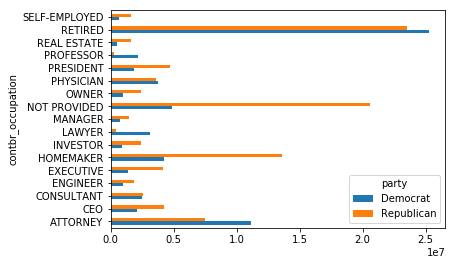

In [219]:
over_2mm.plot(kind='barh')

In [228]:
def get_top_amounts(group,key,n=5):
    totals=group.groupby(key)['contb_receipt_amt'].sum()
    return totals.sort_values(ascending=False)[:n]

In [229]:
grouped=fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts,'contbr_occupation',n=7)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [230]:
grouped.apply(get_top_amounts,'contbr_employer',n=10)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

In [234]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
421           (10, 100]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426         (100, 1000]
427       (1000, 10000]
428         (100, 1000]
429         (100, 1000]
430           (10, 100]
431       (1000, 10000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
436         (100, 1000]
437           (10, 100]
438         (100, 1000]
439         (100, 1000]
440           (10, 100]
              ...      
701356        (10, 100]
701357          (1, 10]
701358        (10, 100]
701359        (10, 100]
701360        (10, 100]
701361        (10, 100]
701362      (100, 1000]
701363        (10, 100]
701364        (10, 100]
701365        (10, 100]
701366        (1

In [244]:
grouped=fec_mrbo.groupby(['cand_nm',labels])
grouped.size().unstack(0)

cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                       493.0          77.0
(1, 10]                    40070.0        3681.0
(10, 100]                 372280.0       31853.0
(100, 1000]               153991.0       43357.0
(1000, 10000]              22284.0       26186.0
(10000, 100000]                2.0           1.0
(100000, 1000000]              3.0           NaN
(1000000, 10000000]            4.0           NaN

In [239]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                      318.24         77.00
(1, 10]                  337267.62      29819.66
(10, 100]              20288981.41    1987783.76
(100, 1000]            54798531.46   22363381.69
(1000, 10000]          51753705.67   63942145.42
(10000, 100000]           59100.00      12700.00
(100000, 1000000]       1490683.08           NaN
(1000000, 10000000]     7148839.76           NaN

In [246]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1),axis=0)
normed_sums

cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                    0.805182      0.194818
(1, 10]                   0.918767      0.081233
(10, 100]                 0.910769      0.089231
(100, 1000]               0.710176      0.289824
(1000, 10000]             0.447326      0.552674
(10000, 100000]           0.823120      0.176880
(100000, 1000000]         1.000000           NaN
(1000000, 10000000]       1.000000           NaN

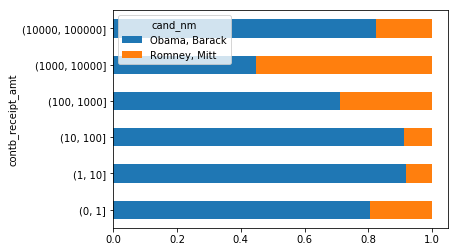

In [250]:
normed_sums[:-2].plot(kind='barh',stacked=True)

In [251]:
grouped = fec_mrbo.groupby(['cand_nm','contbr_st'])
totals=grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1)>100000]
totals[:10]

cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AK             281840.15      86204.24
AL             543123.48     527303.51
AR             359247.28     105556.00
AZ            1506476.98    1888436.23
CA           23824984.24   11237636.60
CO            2132429.49    1506714.12
CT            2068291.26    3499475.45
DC            4373538.80    1025137.50
DE             336669.14      82712.00
FL            7318178.58    8338458.81

In [252]:
percent = totals.div(totals.sum(1),axis=0)
percent[:10]

cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AK              0.765778      0.234222
AL              0.507390      0.492610
AR              0.772902      0.227098
AZ              0.443745      0.556255
CA              0.679498      0.320502
CO              0.585970      0.414030
CT              0.371476      0.628524
DC              0.810113      0.189887
DE              0.802776      0.197224
FL              0.467417      0.532583